## Sanju Mathew - Project on Recommendation Systems

### Objective
* Build a recommendation system to recommend products to customers based on their previous ratings for other products.

### Step 1: Read and explore the given dataset.
* Rename column/add headers, plot histograms, find data characteristics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)
sns.set_palette("Set1")
%matplotlib inline

In [2]:
df = pd.read_csv('ratings_Electronics.csv', names = ['User_Id', 'Product_Id', 'Rating', 'Timestamp'])
df = df.drop(['Timestamp'], axis=1)
df.head()

,User_Id,Product_Id,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


##### Attribute Information:
* User_Id : Every user identified with a unique id
* Product_Id : Every product identified with a unique id
* Rating : Rating of the corresponding product by the corresponding user
* Timestamp : Time of the rating (Dropped)

In [3]:
df.shape

(7824482, 3)

In [4]:
df['Rating'] = df['Rating'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
User_Id       object
Product_Id    object
Rating        int64
dtypes: int64(1), object(2)
memory usage: 179.1+ MB


In [5]:
df.isnull().sum()

User_Id       0
Product_Id    0
Rating        0
dtype: int64

In [6]:
df['Rating'].describe().transpose()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

* Rating range is from 1 to 5
* Ratings are left skewed with a median of 5 and mean of 4

Text(0, 0.5, 'Popularity of products')

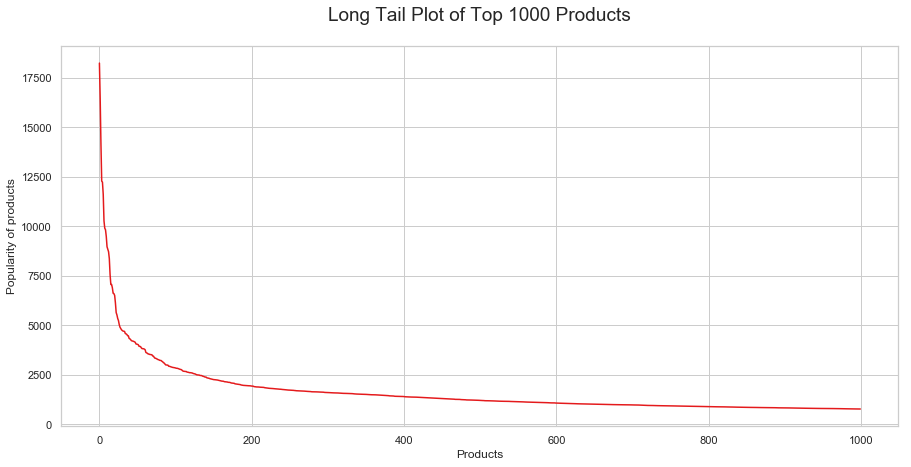

In [7]:
df_Long_Tail = df.groupby(['Product_Id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index().head(1000)
plt.figure(figsize=(15, 7))
sns.lineplot(x=df_Long_Tail.index,y=df_Long_Tail.counts)
plt.title('Long Tail Plot of Top 1000 Products', y=1.05, size=19)
plt.xlabel('Products')
plt.ylabel('Popularity of products')

In [8]:
pd.crosstab(df['Product_Id'], df['Rating'], margins = True).sort_values(by='All', ascending=False).head(6)

Rating,1,2,3,4,5,All
Product_Id,,,,,,
All,901765,456322,633073,1485781,4347541,7824482
B0074BW614,564,524,1058,3333,12765,18244
B00DR0PDNE,1648,1270,1932,3323,8281,16454
B007WTAJTO,1222,293,413,1570,10674,14172
B0019EHU8G,298,127,220,1003,10637,12285
B006GWO5WK,831,424,923,1937,8111,12226


* Top rated product has 18244 ratings

In [9]:
pd.crosstab(df['User_Id'], df['Rating'], margins = True).sort_values(by='All', ascending=False).head(6)

Rating,1,2,3,4,5,All
User_Id,,,,,,
All,901765,456322,633073,1485781,4347541,7824482
A5JLAU2ARJ0BO,67,51,44,83,275,520
ADLVFFE4VBT8,9,24,54,143,271,501
A3OXHLG6DIBRW8,2,7,25,194,270,498
A6FIAB28IS79,7,28,56,128,212,431
A680RUE1FDO8B,21,15,38,36,296,406


* Maximum number of ratings given by a user is 520

### Step 2: Take a subset of the dataset to make it less sparse/ denser.
* Keep the users only who has given 50 or more number of ratings

In [10]:
counts = df['User_Id'].value_counts()
df_final = df[df['User_Id'].isin(counts[counts >= 50].index)]

print('Raw Data Unique Product Count:', df.Product_Id.nunique(), '| Raw Data Unique User Count:  ', df.User_Id.nunique())
print('Subset Unique Product Count:   ', df_final.Product_Id.nunique(), '| Subset Unique User Count:       ', df_final.User_Id.nunique())

final_ratings_matrix = df_final.pivot(index = 'User_Id', columns ='Product_Id', values = 'Rating').fillna(0)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
density = (given_num_of_ratings/possible_num_of_ratings) * 100
print ('Density: {:4.2f}%'.format(density))
final_ratings_matrix.T.head()

Raw Data Unique Product Count: 476002 | Raw Data Unique User Count:   4201696
Subset Unique Product Count:    48190 | Subset Unique User Count:        1540
Density: 0.17%


User_Id,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
Product_Id,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Converting to denser data by droping users with less than 50 ratings

In [11]:
filter_users = df['User_Id'].value_counts() >= 50
filter_users = filter_users[filter_users].index.tolist()

filter_products = df['Product_Id'].value_counts() >= 50
filter_products = filter_products[filter_products].index.tolist()

df_new = df[(df['Product_Id'].isin(filter_products)) & (df['User_Id'].isin(filter_users))]
print('Raw Data Unique Product Count:', df.Product_Id.nunique(), '| Raw Data Unique User Count:  ', df.User_Id.nunique())
print('Subset Unique Product Count:   ', df_new.Product_Id.nunique(), '| Subset Unique User Count:       ', df_new.User_Id.nunique())

final_ratings_matrix_sur = df_new.pivot(index = 'User_Id', columns ='Product_Id', values = 'Rating').fillna(0)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix_sur)
possible_num_of_ratings = final_ratings_matrix_sur.shape[0] * final_ratings_matrix_sur.shape[1]
density = (given_num_of_ratings/possible_num_of_ratings) * 100
print ('Density: {:4.2f}%'.format(density))
final_ratings_matrix_sur.T.head()

Raw Data Unique Product Count: 476002 | Raw Data Unique User Count:   4201696
Subset Unique Product Count:    16993 | Subset Unique User Count:        1540
Density: 0.30%


User_Id,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
Product_Id,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Converting to even lighter and denser data to avoid memory error in Surprise package, droping users and products with less than 50 ratings

Text(0.5, 1.0, 'Subset Data Surprise')

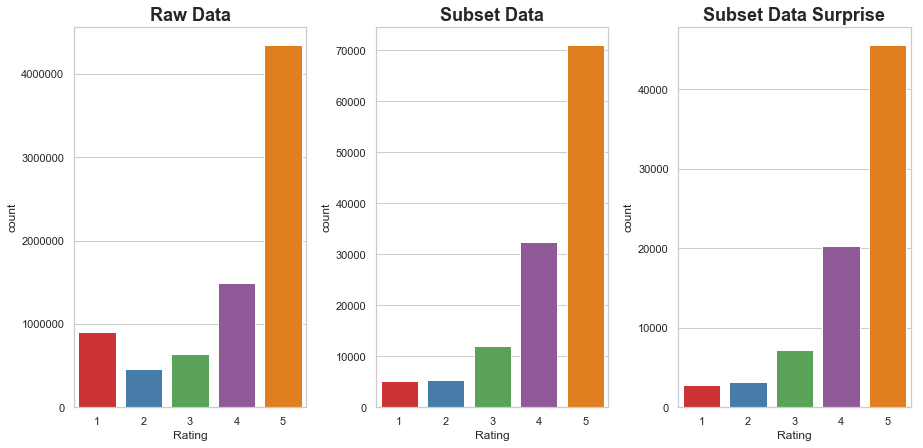

In [12]:
f, ax = plt.subplots(1, 3, figsize = (15, 7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
sns.countplot(x='Rating', data=df, ax=ax[0])
ax[0].set_title("Raw Data", size = 18, weight = "bold")
sns.countplot(x='Rating', data=df_final, ax=ax[1])
ax[1].set_title("Subset Data", size = 18, weight = "bold")
sns.countplot(x='Rating', data=df_new, ax=ax[2])
ax[2].set_title("Subset Data Surprise", size = 18, weight = "bold")

* Most of the users and products dropped had ratings of 1 and 2 relative to higher ratings
* May indicate that users who rate less normally rate a product if they are not happy about it

Text(0.5, 1.0, 'Subset Data Surprise')

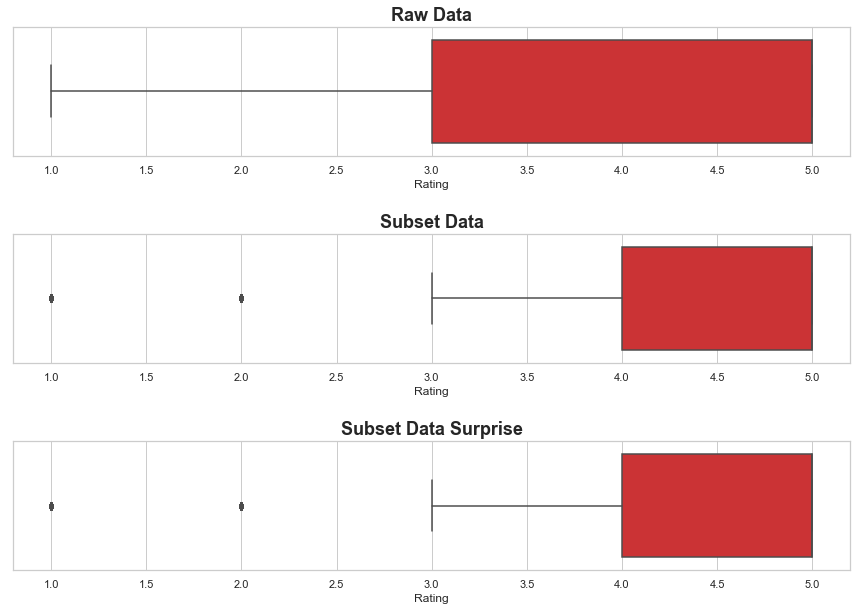

In [13]:
f, ax = plt.subplots(3, 1, figsize = (15, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
sns.boxplot(x = df['Rating'], orient="h", ax = ax[0])
ax[0].set_title("Raw Data", size = 18, weight = "bold")
sns.boxplot(x = df_final['Rating'], orient="h", ax = ax[1])
ax[1].set_title("Subset Data", size = 18, weight = "bold")
sns.boxplot(x = df_new['Rating'], orient="h", ax = ax[2])
ax[2].set_title("Subset Data Surprise", size = 18, weight = "bold")

* Mean appears to be shifting from 4 to 4.26 in Subset Data

### Step 3: Split the data randomly into train and test dataset.
* Split it in 70/30 ratio

In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_final, test_size = 0.3, random_state=0)
print('Train data shape:', train_data.shape, '| Test data shape:', test_data.shape)
train_data.head()

Train data shape: (88109, 3) | Test data shape: (37762, 3)


,User_Id,Product_Id,Rating
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5
4738241,AB094YABX21WQ,B0056XCEAA,1
4175596,A3D0UM4ZD2CMAW,B004I763AW,5
3753016,AATWFX0ZZSE6C,B0040NPHMO,3
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4


In [15]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_new[['User_Id', 'Product_Id', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.3, random_state=0)

* Data is split into 70:30 for Train & Test
* Surprise package data structure requirements are different, hence creating separate dataset for it

### Step 4: Build Popularity Recommender model.

In [16]:
pd.crosstab(train_data['Product_Id'], train_data['Rating'], margins = True).sort_values(by='All', ascending=False).head(6)

Rating,1,2,3,4,5,All
Product_Id,,,,,,
All,3617,3759,8445,22574,49714,88109
B0088CJT4U,2,6,13,56,56,133
B007WTAJTO,5,1,3,16,99,124
B003ES5ZUU,0,2,1,11,108,122
B000N99BBC,0,0,3,21,90,114
B00829THK0,3,2,3,27,62,97


In [17]:
popularity_recommendations = pd.crosstab(train_data['Product_Id'], train_data['Rating']).sort_values(by=5, ascending=False)[5].reset_index().head(5)
popularity_recommendations.rename(columns = {5: 'Score'},inplace=True)
popularity_recommendations['Rank'] = popularity_recommendations['Score'].rank(ascending=0, method='first')
popularity_recommendations

,Product_Id,Score,Rank
0,B003ES5ZUU,108,1.0
1,B007WTAJTO,99,2.0
2,B000N99BBC,90,3.0
3,B002WE6D44,69,4.0
4,B00829THK0,62,5.0


In [18]:
df_popularity_rec = pd.DataFrame()
df_popularity_rec['Train_Recom'] = popularity_recommendations['Product_Id']

* Popularity Recommender model based on the train data with highest 5-star rating counts sorted as score in ascending order

In [19]:
pd.crosstab(test_data['Product_Id'], test_data['Rating'], margins = True).sort_values(by='All', ascending=False).head(6)

Rating,1,2,3,4,5,All
Product_Id,,,,,,
All,1498,1608,3615,9721,21320,37762
B0088CJT4U,0,2,11,25,35,73
B003ES5ZUU,0,0,1,4,57,62
B000N99BBC,0,0,2,7,44,53
B00829TIEK,2,1,2,15,32,52
B008DWCRQW,1,0,8,18,19,46


In [20]:
popularity_recommendations = pd.crosstab(test_data['Product_Id'], test_data['Rating']).sort_values(by=5, ascending=False)[5].reset_index().head(5)
popularity_recommendations.rename(columns = {5: 'Score'},inplace=True)
popularity_recommendations['Rank'] = popularity_recommendations['Score'].rank(ascending=0, method='first')
popularity_recommendations

,Product_Id,Score,Rank
0,B003ES5ZUU,57,1.0
1,B000N99BBC,44,2.0
2,B007WTAJTO,36,3.0
3,B0088CJT4U,35,4.0
4,B00829TIEK,32,5.0


In [21]:
df_popularity_rec['Test_Recom'] = popularity_recommendations['Product_Id']

* Popularity Recommender model based on the test data with highest 5-star rating counts sorted as score in ascending order

In [22]:
pd.crosstab(df_final['Product_Id'], df_final['Rating'], margins = True).sort_values(by='All', ascending=False).head(6)

Rating,1,2,3,4,5,All
Product_Id,,,,,,
All,5115,5367,12060,32295,71034,125871
B0088CJT4U,2,8,24,81,91,206
B003ES5ZUU,0,2,2,15,165,184
B000N99BBC,0,0,5,28,134,167
B007WTAJTO,5,1,3,20,135,164
B00829TIEK,4,3,4,51,87,149


In [23]:
popularity_recommendations = pd.crosstab(df_final['Product_Id'], df_final['Rating']).sort_values(by=5, ascending=False)[5].reset_index().head(5)
popularity_recommendations.rename(columns = {5: 'Score'},inplace=True)
popularity_recommendations['Rank'] = popularity_recommendations['Score'].rank(ascending=0, method='first')
popularity_recommendations 

,Product_Id,Score,Rank
0,B003ES5ZUU,165,1.0
1,B007WTAJTO,135,2.0
2,B000N99BBC,134,3.0
3,B0088CJT4U,91,4.0
4,B00829TIEK,87,5.0


In [24]:
df_popularity_rec['Subset_Data_Recom'] = popularity_recommendations['Product_Id']
df_popularity_rec['Rank'] = popularity_recommendations['Rank'].astype('int64')

* Popularity Recommender model based on the subset data with highest 5-star rating counts sorted as score in ascending order
* Popularity Recommender models have been built based on top 5-star rating counts to ensure highly rated as well as popular products are considered
* Top 5 products from Test and Actual are matching perfectly (except that 2nd and 3rd positions are swapped)
* 4th and 5th position as per Train results are not there in the top 5 in Actual data
* Pure form of Popularity Recommender model Mean has not been considered to ensure products with most good ratings are in results

### Step 5: Build Collaborative Filtering model.

#### Surprise Package

In [25]:
from surprise import SVD, KNNWithMeans, BaselineOnly, accuracy
from surprise.model_selection import GridSearchCV

In [26]:
# param_grid = {'bsl_options': {'method': ['als', 'sgd'],
#                               'reg': [1, 2]},
#               'k': [2, 3],
#               'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
#                               'min_support': [1, 5],
#                               'user_based': [False]}
#               }
# gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)
# gs.fit(data)
# print(gs.best_score['rmse'])
# print(gs.best_params['rmse'])

In [27]:
#algo = gs.best_estimator['rmse']
algo = KNNWithMeans(method='als', reg=1, k= 50, sim_options= {'name': 'cosine', 'min_support': 5, 'user_based': False})
algo.fit(trainset)
test_pred = algo.test(testset)
print('Test', accuracy.rmse(test_pred))
#test_pred[0:5]

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1124
Test 1.1124396686593434


In [28]:
#algo = gs.best_estimator['rmse']
# bsl_options = {'method': 'sgd',
#                'learning_rate': .00005,
#                }

bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
algo.fit(trainset)
test_pred = algo.test(testset)
print(accuracy.rmse(test_pred))
#test_pred[0:5]

Estimating biases using als...
RMSE: 0.9592
0.9591970176766436


In [29]:
# param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
# gs.fit(data)
# print(gs.best_score['rmse'])
# print(gs.best_params['rmse'])

In [30]:
#algo = gs.best_estimator['rmse']
algo = SVD(n_epochs=10, lr_all=0.005, reg_all=0.4)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
#test_pred[0:5]

RMSE: 0.9659
0.9659425528802232


__trainset.build_anti_testset()__

The ratings are all the ratings that are not in the trainset, i.e. all the ratings rui where the user u is known, the item i is known, but the rating rui is not in the trainset. As rui is unknown, it is either replaced by the fill value or assumed to be equal to the mean of all ratings global_mean.

In [31]:
# reader = Reader(rating_scale=(1,5))
# data = Dataset.load_from_df(df_final[['User_Id', 'Product_Id', 'Rating']], reader)

In [32]:
# trainset = data.build_full_trainset()
# algo = SVD(n_epochs=10, lr_all=0.005, reg_all=0.4)
# algo.fit(trainset)
# testset = trainset.build_anti_testset(fill=0)
# predictions = algo.test(testset)

In [33]:
# # uid = str(trainset.to_inner_uid('A141R97FHSSUQ0'))
# # iid = str(trainset.to_inner_iid('B0052SCU8U'))
# uid = 'A1CMD08Z49PGKQ'
# iid = 'B0052SCU8U'
# print(algo.predict(uid, iid))

* Surprise package SVD was attempted for this project but could not be completed due to memory error as the data becomes relatively heavy.
* Hence those results has been attached as separate Reference_Project_Recommendation_Systems_Sanju_Mathew_II.html file and the codes are commented here.

#### Linalg Function

In [34]:
from scipy.sparse.linalg import svds

pivot_df = final_ratings_matrix.copy(deep = True)
index_list = pivot_df.index
pivot_df['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
pivot_df.set_index(['user_index'], inplace=True)

In [35]:
U, sigma, Vt = svds(pivot_df, k = 10)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns, index = index_list)
preds_df.head()

Product_Id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
User_Id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
A100WO06OQR8BQ,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
A105S56ODHGJEK,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
A105TOJ6LTVMBG,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
A10AFVU66A79Y1,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


### Step 6: Evaluate both the models.
* Compute the error (RMSE) on predictions made on the test data.

#### Popularity Recommender model

In [36]:
df_popularity_rec.set_index('Rank')

,Train_Recom,Test_Recom,Subset_Data_Recom
Rank,,,
1,B003ES5ZUU,B003ES5ZUU,B003ES5ZUU
2,B007WTAJTO,B000N99BBC,B007WTAJTO
3,B000N99BBC,B007WTAJTO,B000N99BBC
4,B002WE6D44,B0088CJT4U,B0088CJT4U
5,B00829THK0,B00829TIEK,B00829TIEK


In [37]:
Train_Score, Test_Score = [], []
for i in range(df_popularity_rec.shape[0]):
    if df_popularity_rec.iloc[i,0] in df_popularity_rec.iloc[:,2].tolist():
        Train_Score.append(1)
    else:
        Train_Score.append(0)
for i in range(df_popularity_rec.shape[0]):
    if df_popularity_rec.iloc[i,1] in df_popularity_rec.iloc[:,2].tolist():
        Test_Score.append(1)
    else:
        Test_Score.append(0)
df_popularity_score = pd.DataFrame(list(zip(Train_Score, Test_Score)), columns =['Train Score', 'Test Score'], index = df_popularity_rec.Rank)
print('Train Accuracy:', df_popularity_score['Train Score'].mean(), '| Test  Accuracy:', df_popularity_score['Test Score'].mean())
df_popularity_score

Train Accuracy: 0.6 | Test  Accuracy: 1.0


,Train Score,Test Score
Rank,,
1,1,1
2,1,1
3,1,1
4,0,1
5,0,1


$$RMSE = \sqrt {\sum ^{n}_{i=1}\dfrac {\left( ŷ_{i}-y_{i}\right) ^{2}}{n}}$$

Considering predictions (ŷ) as 1, if predictions were in actual top 5 recommendations
* Train RMSE: $\sqrt {\dfrac {\left( 1-1\right) ^{2}+\left( 1-1\right) ^{2}+\left( 1-1\right) ^{2}+\left( 0-1\right) ^{2}+\left( 0-1\right) ^{2}}{5}}\simeq 0.632$
* Test RMSE:  $\sqrt {\dfrac {\left( 1-1\right) ^{2}+\left( 1-1\right) ^{2}+\left( 1-1\right) ^{2}+\left( 1-1\right) ^{2}+\left( 1-1\right) ^{2}}{5}}=0$

#### Collaborative Filtering model - Linalg Function

In [38]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
Product_Id,,,
0594451647,0.003247,0.001542,0
0594481813,0.001948,0.002341,1
0970407998,0.003247,0.002597,2
0972683275,0.012338,0.011807,3
1400501466,0.012987,0.004848,4


In [39]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('RMSE Linalg Function SVD Model = {} \n'.format(RMSE))

RMSE Linalg Function SVD Model = 0.0033 



#### Collaborative Filtering model - Surprise Package

In [40]:
# preds_df_sur = pd.DataFrame(columns = final_ratings_matrix.columns, index = final_ratings_matrix.index)
# for idx in preds_df_sur.index:
#     Estim = []
#     for col in preds_df_sur.columns:
#         Estim.append(algo.predict(idx, col)[3])
#     preds_df_sur.loc[idx, :] = Estim
# preds_df_sur.head()

In [41]:
# rmse_df_sur = pd.concat([final_ratings_matrix.mean(), preds_df_sur.mean()], axis=1)
# rmse_df_sur.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
# print(rmse_df_sur.shape)
# rmse_df_sur['item_index'] = np.arange(0, rmse_df_sur.shape[0], 1)
# rmse_df_sur.head()

In [42]:
# RMSE_sur = round((((rmse_df_sur.Avg_actual_ratings - rmse_df_sur.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
# print('RMSE Surprise Package SVD Model = {} \n'.format(RMSE_sur))

* RMSE Linalg Function SVD Model: 0.0033 
* RMSE Surprise Package SVD Model: 4.24313 (Based on Reference_Project_Recommendation_Systems_Sanju_Mathew_II.html attached separately).


_Note: RMSE Surprise Package SVD Model results could not be calculated in this notebook as the memory requirements for all the codes together was not available with me and threw up errors_

* These were the results based on the calculation. But may not be comparable as the Linalg Function SVD Model predicted scores close to 0, while Surprise Package SVD Model predicted estimates closer to global mean of 4.261339
* Their Avg_predicted_ratings were subtracted from Avg_actual_ratings which had unknown values filled as 0 in final_ratings_matrix leading to a mean closer to 0, as majority values were unknown.
* Hence they are both on different scales and to adjust the values subtracting by Global Mean of df_final
* RMSE Surprise Package SVD Model: 4.261339 - 4.24313 = 0.018209
* Continuing with Popularity Recommender model based on Subset Data and Collaborative Filtering model based on Linalg Function.

### Step 7: Get top - K ( K = 5) recommendations.
* Recommend new products for each user based on his/her habits.

In [43]:
def recommend(user_id):  
    user_recommendations = popularity_recommendations 
    user_recommendations['User_Id'] = user_id 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols]
    print("Below are the recommended items for User Id: %d" %(user_id))
    print('*'*48)
    return user_recommendations 

from collections import defaultdict
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def recommend_items(userID, pivot_df, preds_df):   
    user_idx = userID-1
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    user = temp.columns[1]
    temp.index.name = 'Recommended Items'
    temp.columns = ['User_Ratings', 'Predictions']
    
    temp = temp.loc[temp.User_Ratings == 0]   
    temp = temp.sort_values('Predictions', ascending=False)
    print('Below are the recommended items for user', user, 'and User_Id:', userID)
    print('*'*72)
    print(temp.head(), "\n", "\n")
    
# def recommend_items_sur(i):   
#     uid = str(trainset.to_inner_uid(i))
#     sorted_items, sorted_user_predictions = [], []
#     for j in top_n[i]:
#         sorted_items.append(j[0])
#         sorted_user_predictions.append(j[1])

#     temp = pd.DataFrame(list(zip([0.0, 0.0, 0.0, 0.0, 0.0], sorted_user_predictions)), columns =['User_Ratings', 'Predictions'], index = sorted_items)
#     temp.index.name = 'Recommended Items'
#     print('Below are the recommended items for user', i)#, 'and User_Id:', uid)
#     print('*'*55)
#     print(temp, "\n", "\n")

#### Popularity Recommender model

In [44]:
find_recom = [50, 100, 150]
for i in find_recom:
    print(recommend(i), "\n")

Below are the recommended items for User Id: 50
************************************************
   User_Id  Product_Id  Score  Rank
0       50  B003ES5ZUU    165   1.0
1       50  B007WTAJTO    135   2.0
2       50  B000N99BBC    134   3.0
3       50  B0088CJT4U     91   4.0
4       50  B00829TIEK     87   5.0 

Below are the recommended items for User Id: 100
************************************************
   User_Id  Product_Id  Score  Rank
0      100  B003ES5ZUU    165   1.0
1      100  B007WTAJTO    135   2.0
2      100  B000N99BBC    134   3.0
3      100  B0088CJT4U     91   4.0
4      100  B00829TIEK     87   5.0 

Below are the recommended items for User Id: 150
************************************************
   User_Id  Product_Id  Score  Rank
0      150  B003ES5ZUU    165   1.0
1      150  B007WTAJTO    135   2.0
2      150  B000N99BBC    134   3.0
3      150  B0088CJT4U     91   4.0
4      150  B00829TIEK     87   5.0 



* Popularity Recommender model recomendations are same for all users
* It is not personalised as per user habits

#### Collaborative Filtering model - Linalg Function

In [45]:
find_recom = [50, 100, 150]
for i in find_recom:
    recommend_items(i, pivot_df, preds_df)

Below are the recommended items for user A141R97FHSSUQ0 and User_Id: 50
************************************************************************
                   User_Ratings  Predictions
Recommended Items                           
B0088CJT4U                  0.0     1.663672
B00829TIEK                  0.0     1.272065
B002R5AM7C                  0.0     1.116708
B004CLYEDC                  0.0     1.019160
B00829THK0                  0.0     0.993060 
 

Below are the recommended items for user A18OTCHQ6MXD6X and User_Id: 100
************************************************************************
                   User_Ratings  Predictions
Recommended Items                           
B007WTAJTO                  0.0     0.667908
B003ES5ZUU                  0.0     0.453355
B002V88HFE                  0.0     0.371520
B001TH7GUU                  0.0     0.287293
B000QUUFRW                  0.0     0.286647 
 

Below are the recommended items for user A1CMD08Z49PGKQ and User_Id: 15

* Collaborative Filtering model is personalised as per each users habits

#### Collaborative Filtering model - Surprise Package

In [46]:
# top_n = get_top_n(predictions, n=5)
# find_recom = ['A141R97FHSSUQ0', 'A18OTCHQ6MXD6X', 'A1CMD08Z49PGKQ']
# for i in find_recom:
#     recommend_items_sur(i)

* Surprise Package was tried on df_new and gave results. But could not be compared with recommendations based on df_final as the data was not consistent.
* While RMSE of df_new did not perform better than df_final for Linalg Function

### Step 8: Summarise your insights.

#### Popularity Recommender model
As mentioned earlier Popularity Recommender model recommendations are same for all users as it is based on frequency count of top ratings independent of users. It is not personalised as per users past habits and can be used to mitigate cold start issues while creating a hybrid model. Same top 5 products as given below are recommended for all. (Both A141R97FHSSUQ0 & A18OTCHQ6MXD6X)
* B003ES5ZUU
* B007WTAJTO
* B000N99BBC
* B0088CJT4U
* B00829TIEK 


#### Collaborative Filtering model
It is personalised as per each users past habits. For user A141R97FHSSUQ0 below are the top 5 product recommendations
* B0088CJT4U
* B00829TIEK
* B002R5AM7C
* B004CLYEDC
* B00829THK0


While for user A18OTCHQ6MXD6X below top 5 product recommendations are very unique to his/her past ratings compared to previous user
* B007WTAJTO
* B003ES5ZUU
* B002V88HFE
* B001TH7GUU
* B000QUUFRW